## Training of neuron with various activation functions.

Part 1: A college professor believes that if the grade for internal examination is high in a class, the grade for external examination will also be high. A random sample of 7 students in that class was selected, and the data is given below:

          Input:  0.1  | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7

          Target: 1.2 | 1.4 | 1.55 | 1.75 | 2.01 | 2.2 | 2.35

Write a python program for linear regression using a single neuron (with proper activation function) on the above dataset, and find the coefficients w1 and b. Predict the external marks if internal marks are 0.15. Draw the scatter plot between Internal Exam and External Exam .Draw a straight line with red line using above w1, w2 and b.

In [3]:
 # Training a neuron to learn 
import numpy as np
def neuron_training(x,target):
    #initializing the weight
    w=np.random.randn(1,2)
    eta=0.1
    epoch=0
    Etotal=1
    Erequired=0.1
    while(Etotal>Erequired and epoch<100):
        Etotal=0
        epoch=epoch+1
        for i in range(len(x)):

            #forward pass
            input=x[i]
            d=target[i]
            new_input=np.append(input,1)
            y=np.dot(w,new_input)

            #Gradient descent
            error = 0.5*(d-y)**2
            Etotal=Etotal+error
            # print("Error: ",Etotal,"\n")
            delta_w=eta*(d-y)*input
            w=w+delta_w
        Etotal=Etotal/7
        print("Error: ",Etotal,"\n")
        

    return w,epoch

In [4]:
# Defining the input and output
input_array = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
output_array = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])
output=neuron_training(input_array,output_array)
weight=output[0]
epoch=output[1]
print("Final weight: ",weight)
if epoch == 100:
    print("Epoch limit reached")
    print ("Problem cannot be solved with one neuron")
        
else:
    print("Epoch = ",epoch)
    print ("Problem solved with one neuron") 



Error:  [0.72099977] 

Error:  [0.28869293] 

Error:  [0.11581014] 

Error:  [0.0483952] 

Final weight:  [[1.07777397 1.19181212]]
Epoch =  4
Problem solved with one neuron


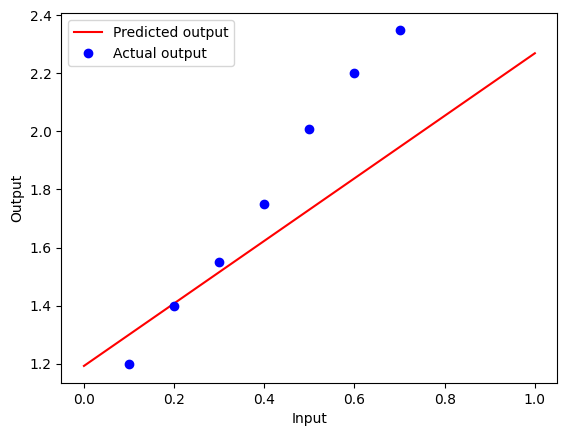

In [5]:
#Plotting the graph
import matplotlib.pyplot as plt

# Predicted output
x = np.linspace(0, 1, 100)
y = weight[0][0]*x + weight[0][1]
plt.plot(x, y, '-r', label='Predicted output')

# Actual output
plt.plot(input_array, output_array, 'ob', label='Actual output')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='upper left')


plt.show()

In [6]:
#predicting the output
def neuron_predict(x,w):
    input=np.append(x,1)
    y=np.dot(w,input)
    return y

#predicting the output
input=0.8
output=neuron_predict(input,weight)
print("Output for input ",input," is ",output)

Output for input  0.8  is  [2.0540313]


### Part B Generate 51 points for 
                  
                  t = 11 + exp(-3x) , where x ∈ [-2,3].

Use this dataset to train sigmoid neuron using gradient descent learning algorithm. Draw two curves with different colours, for target and output (y) of the trained neuron.

Epoch 0: Loss = 0.5861
Epoch 100: Loss = 0.0169
Epoch 200: Loss = 0.0116
Epoch 300: Loss = 0.0105
Epoch 400: Loss = 0.0099
Epoch 500: Loss = 0.0096
Epoch 600: Loss = 0.0094
Epoch 700: Loss = 0.0092
Epoch 800: Loss = 0.0091
Epoch 900: Loss = 0.0089


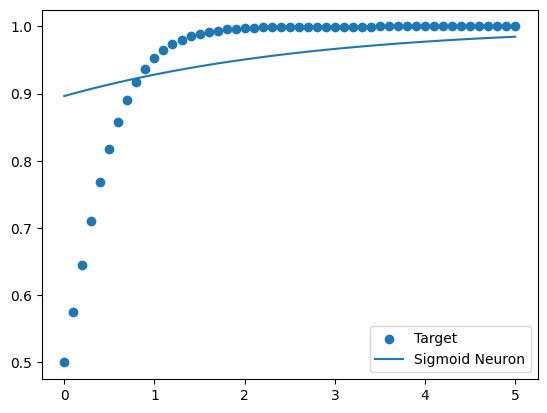

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

In [8]:
def generate_data(n):
    x = np.linspace(0, 5, n)
    y = 1 / (1 + np.exp(-3 * x))
    return x, y
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
n = 51
X, y = generate_data(n)
w = np.random.randn()
b = np.random.randn()
learning_rate = 0.1
epochs = 1000
for epoch in range(epochs):
    y_pred = sigmoid(w * X + b)
    loss = mse_loss(y, y_pred)
    delw = np.mean(X * (y_pred - y) * sigmoid_prime(w * X + b))
    delb = np.mean((y_pred - y) * sigmoid_prime(w * X + b))
    w = w - learning_rate * delw
    b = b - learning_rate * delb
    if epoch % 100 == 0:
        print("Epoch {}: Loss = {:.4f}".format(epoch, loss))
plt.scatter(X, y, label="Target")
plt.plot(X, sigmoid(w * X + b), label="Sigmoid Neuron")
plt.legend()
plt.show()

In [9]:
print(x)
print("----------------------------------")
print(y)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898